# Effects of Loan Characteristics on Loan Status
## by Ndidi Charles Nweke

## Investigation Overview

The objective here is to understand "What factors affect a borrower’s ability to pay back a loan?" -- Loan Status. The focus was on exploring several features that could affect the Loan Status like Loan term, Stated Monthly Income, monthly loan payment, Income range and employment status to see how they contribute to borrower's ability to pay back a loan.

I looked at the distribution of loan status, the Employment status. Then the correlation of the Stated monthly Income, Monthly repayment and the loan term. I went further to create the loan-income-ratio column which combines monthly income and monthly loan payment. 

## Dataset Overview

The dataset consists of 113937 rows and 81 columns of loan data. It is financial dataset related to loan, borrowers, investors, interest rates and more. 22 features were collected and used for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
load_data = pd.read_csv("prosperLoanData.csv")

# create a dataset of only the variables I would be working with
prosper = load_data.loc[:, ['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
        'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CurrentDelinquencies',
        'AmountDelinquent', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey',
        'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'MonthlyLoanPayment']]

# rename the listing category to something friendly
prosper.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

## Distribution of Loan Status

Let us explore the main variable of interest which is the Loan Status (Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.). All the past due dates were merged into one.

In [3]:
# combine all past dues in Loan Status into one
prosper['LoanStatus'] = prosper['LoanStatus'].replace(['Past Due (16-30 days)', 'Past Due (61-90 days)',
        'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Past Due (1-15 days)'], 'Past Due')

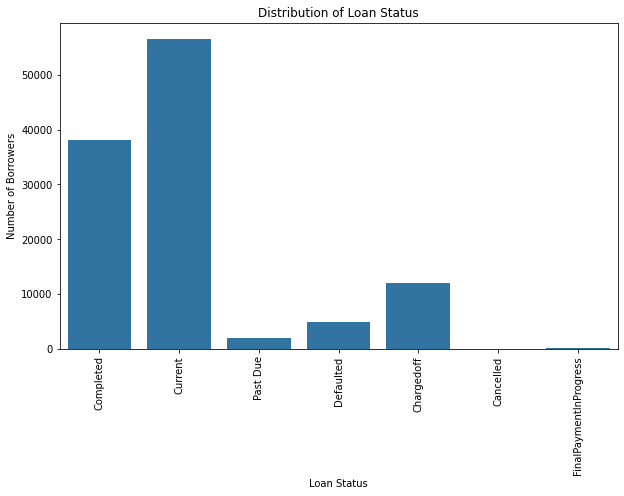

In [4]:
# plot of loan status
plt.figure(figsize=[10, 6])
sb.countplot(data=prosper, x = 'LoanStatus', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel("Number of Borrowers")
plt.title("Distribution of Loan Status")
plt.show()

## Distribution of Employment Status

Being employed, whether working for someone or self-employed proves someone's ability to pay back a loan. Despite different categories given to the Employment status column, a large amount of the borrowers partake in one work or the other.

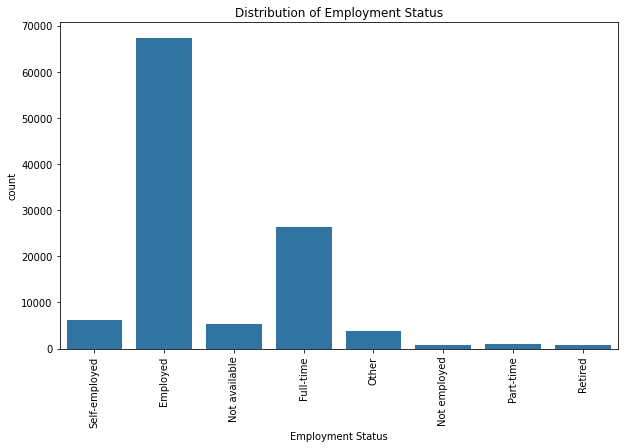

In [5]:
# plot of exployment status
plt.figure(figsize=[10, 6])
sb.countplot(data=prosper, x = 'EmploymentStatus', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.title("Distribution of Employment Status")
plt.show()

## Correlation of Interested Numeric Variables

Did a correlation of StatedMonthlyIncome, MonthlyLoanPayment, Term to understand their significance for the analysis.
At first, I believe these variables will help us get an answer, but let's confirm further.

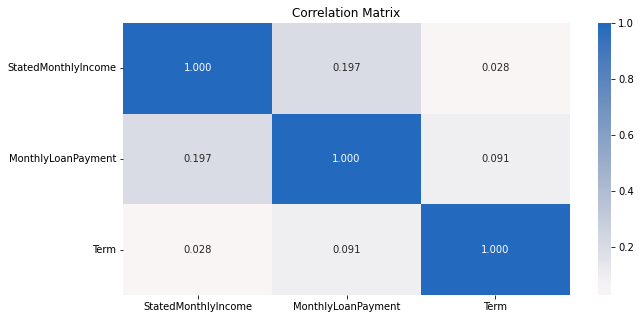

In [6]:
# Correlation matrix for the numeric variables
numeric_vars = ["StatedMonthlyIncome", "MonthlyLoanPayment", "Term"]

plt.figure(figsize = [10, 5])
sb.heatmap(prosper[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

## Loan-Income-Ratio vs Loan term against Loan Status

The correlation of the three variables implies that there is hope. However, since to be able to pay back a loan one needs to be working and also, their monthly income should be enough to take them through the month alongside paying their loan. Let's create a column Loan-Income-Ratio **(MonthlyLoanPayment/StatedMonthlyIncome)\*100)**  which would be a measure of how much borrowers are setting aside for loan repayments.

In [7]:
# create a loanIncomeRatio column
prosper["LoanIncomeRatio"] = (prosper["MonthlyLoanPayment"]/prosper["StatedMonthlyIncome"])*100
prosper['LoanIncomeRatio'] = prosper['LoanIncomeRatio'].replace(np.inf, np.nan)
prosper = prosper.drop(prosper[prosper['LoanIncomeRatio'] == np.nan].index)

In [8]:
# get loan status = past due | defaulted | charged off for the $0 income range as bad loans
bad_ = (prosper['LoanStatus'] == 'Past Due') | (prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')
bad_loans = prosper.loc[bad_, :]

# create a subset for the good loans
good_loans = prosper.loc[~bad_, :]

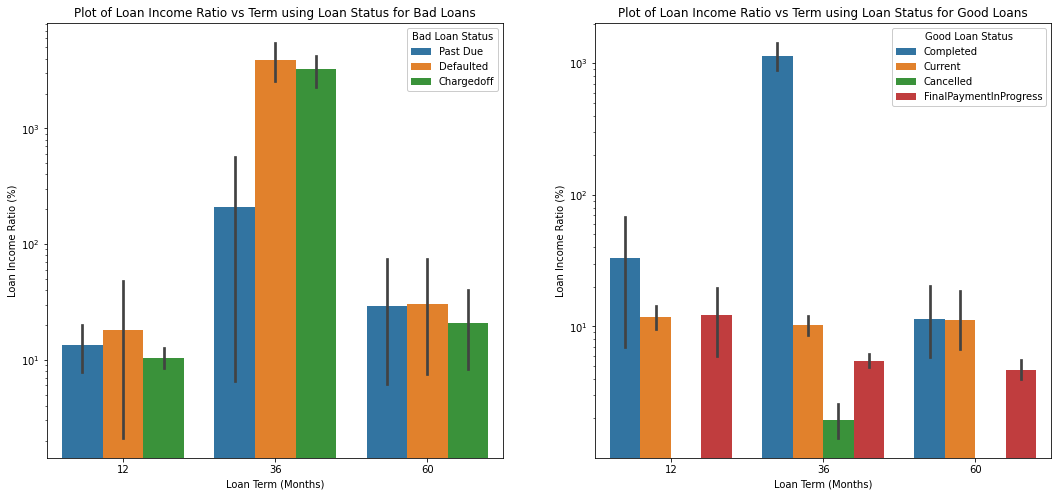

In [9]:
# log transform the plot of LoanIncomeRatio vs Term and Loan Status for bad loans
plt.figure(figsize=[18,8])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bad_loans, x = 'Term', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.yscale('log')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Income Ratio (%)')
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('Plot of Loan Income Ratio vs Term using Loan Status for Bad Loans');

# log transform the plot of LoanIncomeRatio vs Term and Loan Status for good loans
plt.subplot(1, 2, 2)
ax = sb.barplot(data = good_loans, x = 'Term', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.yscale('log')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Loan Income Ratio (%)')
ax.legend(ncol=1, framealpha=1, title='Good Loan Status')
plt.title('Plot of Loan Income Ratio vs Term using Loan Status for Good Loans');

## Loan Income Ratio vs Employment Status and Loan Status

The plot of loan-income-ratio, loan terms and loan status showed that, irrespective of the duration, the higher the monthly loan payment to income ratio, the lesser the likelihood of the borrower completing their payment. To prove this further, let's create a plot of loan-income-ratio, employment status and loan status to to see another view.

From the below, loan-income-ratio for the bad loans segment showed a high variance along the part-time workers, employed, other, and retired. This is a sign of borrowing above one's monthly income. Although the same variance is obtainable for the retired in the good loans part, we believe they have other income sources that cannot immediately accounted for. 

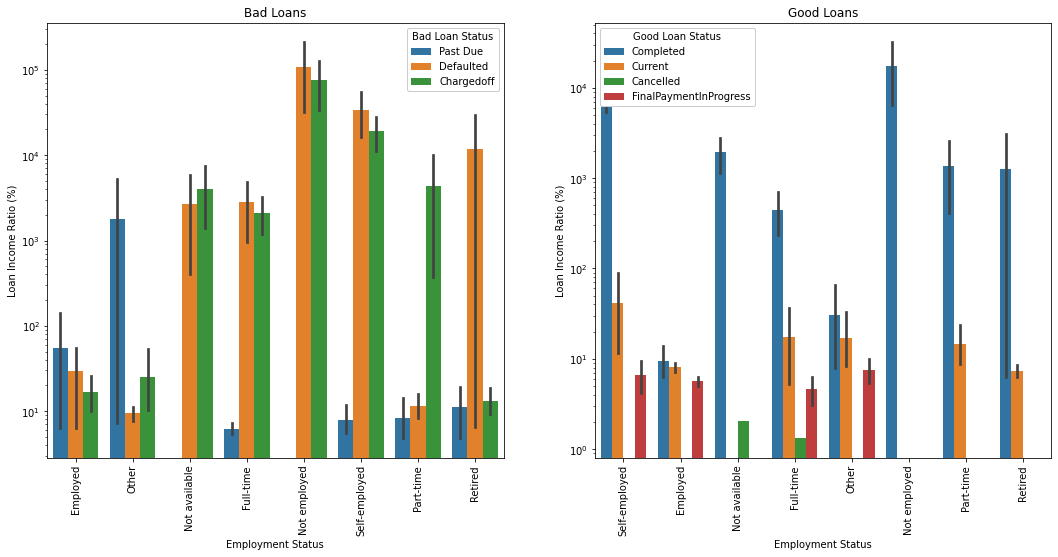

In [10]:
# the plot of LoanIncomeRatio vs Employment status and Loan Status
plt.figure(figsize=[18,8])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bad_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Loan Income Ratio (%)')
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('Bad Loans');

plt.subplot(1, 2, 2)
# the plot of LoanIncomeRatio vs EmploymentStatus and Loan Status
ax = sb.barplot(data = good_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Loan Income Ratio (%)')
ax.legend(ncol=1, framealpha=1, title='Good Loan Status')
plt.title('Good Loans');